<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/XCM_An_Explainable_Convolutional_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##XCM - An Explainable Convolutional Neural Network

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, concatenate


In [3]:

# Load the dataset
df = pd.read_csv('/content/AMZN.csv')  # Assuming this is the correct path to your data file

# Let's assume 'Close' is the target variable for prediction
df = df[['Close']]

In [4]:

# Load and preprocess data (assuming the data is already loaded in variable `df`)
# Normalization of data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [6]:

# Preparing the dataset
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])  # Assuming the first column is the target
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(scaled_data, time_steps)


In [7]:

# Splitting data into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the XCM model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# 1D Convolutional Layer for capturing local patterns
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Flatten the layer
flat = Flatten()(pool1)

# Fully connected layer
fc = Dense(64, activation='relu')(flat)

# Output layer
output_layer = Dense(1)(fc)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.8567e-04 - val_loss: 5.6269e-05
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7835e-06 - val_loss: 5.7603e-05
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0351e-06 - val_loss: 8.2884e-05
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5930e-06 - val_loss: 5.1889e-05
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4292e-06 - val_loss: 4.6099e-05
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9121e-06 - val_loss: 5.6049e-05
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8180e-06 - val_loss: 5.2272e-05
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6051e-06 - val_loss: 4.1552e-05
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4416e-06 - val_loss: 5.6700e-05
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9350e-06 - val_loss: 4.0591e-05
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

In [8]:

# Define the XCM model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# 1D Convolutional Layer for capturing local patterns
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Flatten the layer
flat = Flatten()(pool1)

# Fully connected layer
fc = Dense(64, activation='relu')(flat)

# Output layer
output_layer = Dense(1)(fc)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9249e-04 - val_loss: 1.1442e-04
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9915e-06 - val_loss: 5.4055e-05
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6699e-06 - val_loss: 5.2702e-05
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1631e-06 - val_loss: 5.1255e-05
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2571e-06 - val_loss: 9.3508e-05
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4903e-06 - val_loss: 4.6949e-05
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2771e-06 - val_loss: 4.5754e-05
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0695e-06 - val_loss: 4.6155e-05
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9468e-06 - val_loss: 6.7765e-05
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4644e-06 - val_loss: 5.7253e-05
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

Test Loss: 0.0006140316836535931
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 4.6214246248646615
MAE: 3.4311752768557517
MAPE: 2.866808996432153


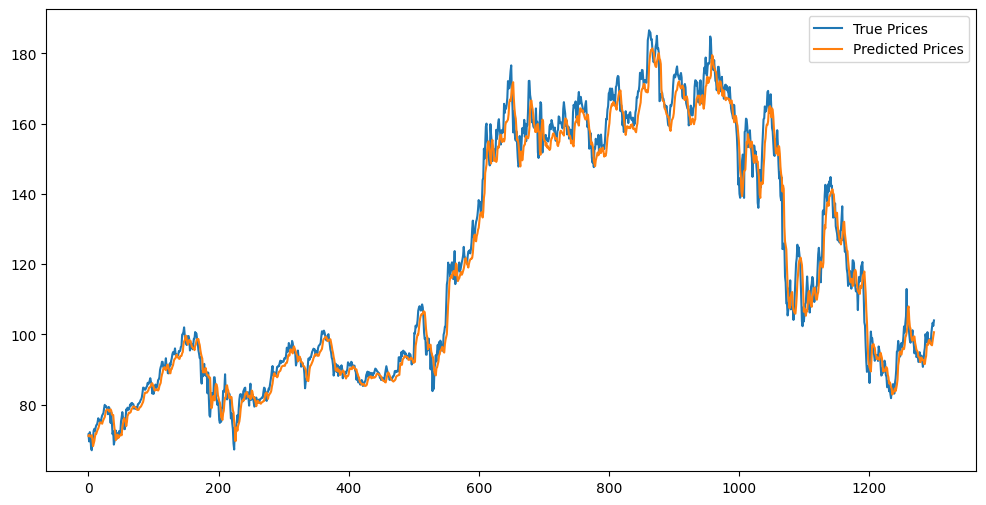

In [9]:

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Predict
predictions = model.predict(X_test)

# Inverse scaling
predictions_inverse = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()


Test Loss: 0.0006140316836535931
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 4.6214246248646615
MAE: 3.4311752768557517
MAPE: 2.866808996432153


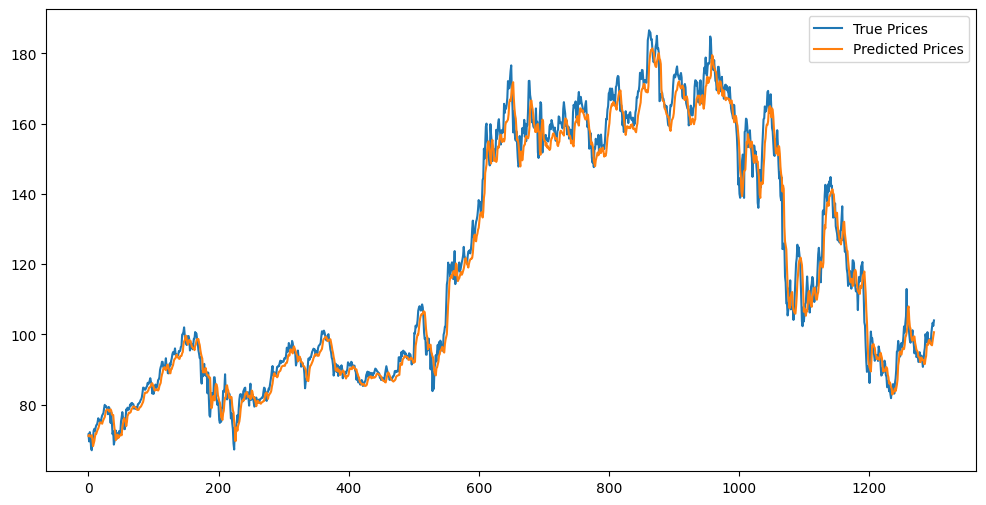

In [10]:

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Predict
predictions = model.predict(X_test)

# Inverse scaling
predictions_inverse = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()
